Problem 3(b)

When T = 3, 
$A = \begin{bmatrix}
0.75 & -1 \\
1 & 0.75
\end{bmatrix}$, 
$B = \begin{bmatrix}
1 & 0.5 \\
0.5 & 0.5
\end{bmatrix}$, we can consider the problem based on (a).

The optimal value function 


$$V^{*}_{t}(x) = min\{l(x, u_t) + V^{*}_{t + 1}(Ax_{t + 1}), l(x, u_t) + V^{*}_{t + 1}(Bx_{t + 1})\}, t = 0, 1, ..., T - 1$$
$$V^{*}_{T}(x) = l(x_T) = \frac{1}{2} x^Tx, t=T$$
Thus, the dynamic programming actually can be realized by a recursive function, which is Optimal_Search(x, T, t) below.

The code is shown as following:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Some useful functions
def motion_model(xt, ut):
    """
        Inputs:
            xt - current state
            ut - control input. 
                ut = 0 <- policy 1
                ut = 1 <- policy 2
        Output:
            xt - next state
    """

    if ut == 0:
        A = np.array([[.75, -1],
                      [1, .75]])
        xt = A @ xt
    else:
        B = np.array([[1, .5],
                      [.5, .5]])
        xt = B @ xt
    
    return xt

def ComputeCost(x):
    """
        Compute cost
    """
    x = x.reshape(2, 1)
    return 1/2 * (x.T @ x)

In [3]:
def Optimal_Search(x, T, t):
    """
        Inputs:
            x is the initial condition, it should be a 2-by-1 array.
            T is the horizon. 
             start at t = 2, T = 1;
                   at t = 1, T = 2;
                   at t = 0, T = 3.
        Outputs:
            policy is the policy for every stage.
            V_opt is the optimal cost-to-go values.
    """
    if t == T:
        return np.argmin(ComputeCost(x)), np.min(ComputeCost(x))
    else:
        V1 = ComputeCost(x) + Optimal_Search(motion_model(x, 0), T, t + 1)[1]
        V2 = ComputeCost(x) + Optimal_Search(motion_model(x, 1), T, t + 1)[1]
        policy = np.argmin([V1, V2])
        V_opt = np.min([V1, V2])
        return  policy, V_opt 

In [12]:
# main function
# create a grid on [-1, 1] x [-1, 1]
N = 200
x_range = np.linspace(-1, 1, N)
y_range = x_range.copy()
X, Y = np.meshgrid(x_range, y_range)
pts_list = np.vstack([X.ravel(), Y.ravel()])# return 2-by-N matrix
pts = np.stack((X, Y), axis = 0) # stack X,Y as 2-by-N-by-N

policy = np.zeros((3, N, N))
V = np.zeros((3, N, N))
for i in range(N):
    for j in range(N):
        x0 = pts[:, i, j]
        x0 = x0.reshape(2, 1)
        for t in range(3):
            policy[t, i, j], V[t, i, j] = Optimal_Search(x0, 3, t)


Text(0.5,0.92,'Optimal Value function V_0')

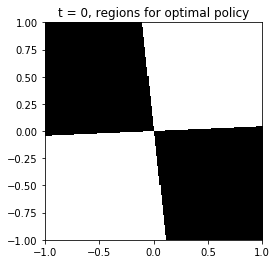

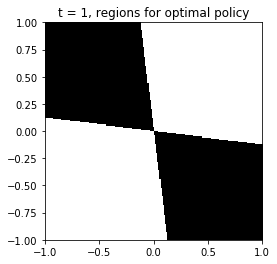

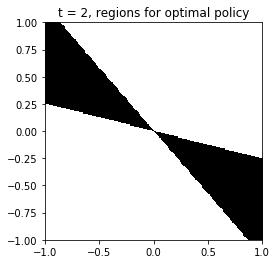

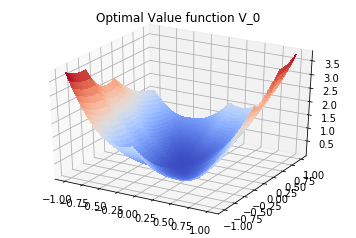

In [26]:
# display the results
plt.figure()
plt.imshow(policy[0, :, :], cmap='gray', extent=[-1,1,-1,1])
plt.title("t = 0, regions for optimal policy")

plt.figure()
plt.imshow(policy[1, :, :], cmap='gray', extent=[-1,1,-1,1])
plt.title("t = 1, regions for optimal policy")

plt.figure()
plt.imshow(policy[2, :, :], cmap='gray', extent=[-1,1,-1,1])    
plt.title("t = 2, regions for optimal policy")

Z = V[0, :, :].reshape(N, N)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title("Optimal Value function V_0")

For region figures, black region presents policy 1, where $u_t = 1$ and white region represents policy 2, where $u_t = 2$.

